# Mechanics Lab 9-- A puck on a rotating turntable

Today you'll be considering a frictionless puck on a horizontal turntable. It will give you practice mentally shifting between inertial and non-inertial reference frames and working with both the centrifugal and Coriolis forces. 

First you will predict the behavior of the puck in two special cases. Then you will determine the equations of motion numerically and analyze the behavior of the puck under different initial conditions. For your final output, you'll produce a movie of the puck in both the inertial and non-inertial reference frames.

## Objectives

In this lab you will 
* integrate the equation of motion to find the trajectory of the puck in a non-inertial reference frame,
* compare the behavior of the puck in both the inertial and non-inertial reference frames,
* and explore the behavior of the puck with several different initial conditions.


In [1]:
%pylab inline
from scipy.integrate import odeint  # import the differential equation integrator
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib




## Pre-lab questions

#### Exercise 9.1 
To get you thinking about motion in a non-inertial reference frame, answer the question 9.19 from your textbook (Taylor 2005), transcribed below.

9.19. I am standing (wearing crampons) on a perfectly frictionless flat merry-go-round, which is rotating counterclockwise with angular velocity $\Omega$ about its vertical axis.

(**a**) I am holding a puck at rest just above the floor (of the merry-go-round) and release it. Describe the puck's path as seen from above by an observer who is looking down from a nearby tower (fixed to the ground) and also as seen by me on the merry-go-round. 

(**b**) Answer the same questions for a puck which is released from rest by a long-armed spectator who is standing on the ground leaning over the merry-go-round.

   a. As seen from another observer, the puck will move in direction of the tangent line. The velocity will be $\Omega$ times the radius of the merry-go-round. As seen from the oberver on marry-go-around, the direction of velocity is same as the direction vector R, perpendicular to axis of rotation outward. 
   
   b. As seen from another observer, there is no displacement in horizontal direction. As seen from observer on marry-go-round, the path is a circle, becasue if we change the coordinate from inertial to non intertial, radius stays the same but $\theta_{nonintert} = \theta_{inert} - \Omega t$

## Framing the problem
In order to solve this problem either numerically, the first steps are to find the equations of motion and set the initial conditions.
 
As you may have learned in class already, in a rotating frame, there will be two ficticious (also called inertial) forces acting on an object in addition to regular forces that might be acting on it. One of them is the centrifugal force, which tries to throw an object outward away from the axis of rotation. The other one is called the Coriolis force, and it is responsible for the counterclockwise wind direction of hurricanes in the Northern hemisphere. Mathematically, the centrifugal force is given by

$$\vec{F}_{cf}=m(\vec{\Omega}\times\vec{r})\times\vec{\Omega}$$

where $\vec{r}$ is the position vector of an object in the rotating frame and $\vec{\Omega}$ is the angular velocity vector describing the rotation of the noninertial frame. The Coriolis force is given by

$$\vec{F}_{cor}=2m\left(\frac{d\vec{r}}{dt}\times\vec{\Omega}\right)$$

### Equations of motion
#### Exercise 9.2
On a piece of paper, write down Newton's second law for the puck for the coordinates \\(x\\) and \\(y\\) as seen by someone standing on the turntable. Assume that the turntable is rotating counterclockwise with angular velocity \\(\Omega\\). (Be sure to include the centrifugal and Coriolis forces, but ignore the earth's rotation.)

### Setting the initial conditions and other physical parameters
#### Exercise 9.3
In the cell below, define a set of variables for the initial position and velocity in the non-inertial reference frame and set \\( \Omega = 1 \\). To begin, let the initial position be $\bf{r_0}$$ = (1,0)$ and the initial velocity in the rotating reference frame be $\bf{v_0}$$ = (0,1)$.

In [2]:
# Define omega and the initial position and velocity of the puck
omega = 1
r_0 = [1,0]
v_0 = [0,1]


### Numerically solving the equations of motion

#### Exercise 9.4
In the cell below, define a function, deriv, that will return the derivatives for your four variables. Then use odeint to solve for ${\bf r}(t)$ in the non-inertial reference frame for \\(0 \leq t \ \leq 2 \pi \\).

In [3]:
# Define your deriv function and use odeint to solve for the trajectory of the puck from 0 <= t <= 2pi
def deriv(f,t):
    x = f[0]
    y = f[1]
    vx = f[2]
    vy = f[3]
    
    d2xdt2 = 2*omega*vy+omega**2*x
    d2ydt2 = -2*omega*vx+omega**2*y
    
    return array([vx,vy,d2xdt2,d2ydt2])
  
time = linspace(0,2*pi,1000)
fInit = r_0 + v_0

r = odeint(deriv,fInit,time)

#### Exercise 9.5
Plot the position of the puck below. The existing code will create a grey circle representing the turntable. All that is needed is to plot the trajectory over it.

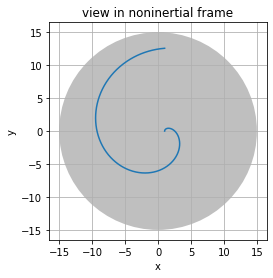

In [4]:
# Plotting the trajectory of the puck

figure()
# Add command to plot the pucks trajectory
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x = r[:,0]
y = r[:,1]
plot(x,y)
title('view in noninertial frame')
xlabel('x')
ylabel('y')
grid()
show()



### Comparing the trajectory in the rotating reference frame to that in a fixed inertial reference frame
You will gain a better understanding of what is going on if you plot the trajectory of the puck in a fixed reference frame as well. 

#### Exercise 9.6
First fill in the code below to create a function that will return the x and y coordinates of the trajectory in the fixed reference frame. Your function should take a time (either as a single value or in the form of an array) and a list of the initial conditions (in the inertial reference frame) and return a list of the x and y positions at that time. If the function is properly set up, calling it with an array of time values should cause it to return a list of two arrays - the x and y positions.

In [5]:
#x and y positions of the puck in the inertial reference frame
def pos_prime(f,t): 
    
    # Function values:    
    x = f[0] ### FIX
    dxdt = f[1] ### FIX
    y = f[2] ### FIX
    dydt = f[3] ### FIX
    
    return [x+t*dxdt , y+t*dydt] ### FIX

#initial conditions in inertial reference frame
x0 = 1
y0 = 0
vx = 0
vy = 1 + 1*1
f_init_prime =  array([x0,vx,y0,vy]) ### FIX 
time = array(time)
f_solun_prime = pos_prime(f_init_prime,time)

#### Exercise 9.7
Plot the trajectories in both the rotating and non-rotating reference frames (including the turntable). Your plots will be easier to compare if they are lined up horizontally next to each other. Use the *subplot* routine to plot them side by side.

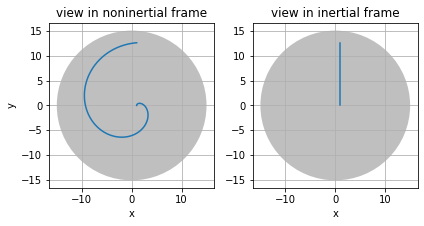

In [6]:
# Plots go here:
figure()
subplot(1,2,1)
grid()
# Add command to plot the pucks trajectory
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x = r[:,0]
y = r[:,1]
plot(x,y)
title('view in noninertial frame')
xlabel('x')
ylabel('y')

# Add command to plot the pucks trajectory
subplot(1,2,2)
grid()
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x_fix = f_solun_prime[0]
y_fix = f_solun_prime[1]
plot(x_fix,y_fix)
title('view in inertial frame')
xlabel('x')

tight_layout()


#### Exercise 9.8
In the space below, justify that your plots of the trajectories in both reference frames are consistent with each other.

First in the  inertial frame. Since initial position is (1,0) and initial velocity is (0,2), so the path is a line from (1,0) to (1,4pi). 

Second, in the rotating frame. The net displacement is from (1,0) to (1,4pi). The rotation part is caused by coriolis force changing the direction of the velocity. The effect of centrifugal force perfectly cancels out. 

### Explore different initial conditions

#### Exercise 9.9
Change the initial velocity of the puck to reflect both situations asked about in the pre-lab question and include your plots below for both the inertial and non-inertial reference frames. Be sure to avoid any unecessary duplication of code.

In the space below, compare your predictions to the numerically-derived solutions.  Be sure to explain any discrepancies.

   For the situation where the person is at rest relative to the turntable dropping the puck, the expectation mathces our plot. 
   
   For the situation where the person is at rest relative to the inertial reference frame dropping the puck, the expectation maches our plot. 

This is the situation when the puck is released from rotational frame


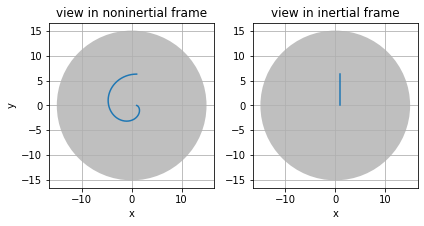

In [7]:
#Fill in the code for the person at rest relative to the turntable dropping the puck.

print("This is the situation when the puck is released from rotational frame")
# Define omega and the initial position and velocity of the puck
omega = 1
r_0 = [1,0]
v_0 = [0,0]

fInit = r_0 + v_0

r = odeint(deriv,fInit,time)

x0 = r_0[0]
y0 = r_0[1]
vx = v_0[0]
vy = v_0[1] + sqrt(x0**2+y0**2)*omega
f_init_prime =  array([x0,vx,y0,vy]) ### FIX 
time = array(time)
f_solun_prime = pos_prime(f_init_prime,time)

# Plots go here:
figure()
subplot(1,2,1)
grid()
# Add command to plot the pucks trajectory
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x = r[:,0]
y = r[:,1]
plot(x,y)
title('view in noninertial frame')
xlabel('x')
ylabel('y')

# Add command to plot the pucks trajectory
subplot(1,2,2)
grid()
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x_fix = f_solun_prime[0]
y_fix = f_solun_prime[1]
plot(x_fix,y_fix)
title('view in inertial frame')
xlabel('x')

tight_layout()

This is the situation when the puck is released from inertial frame


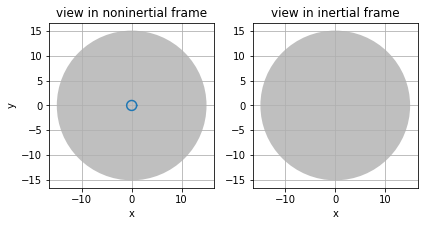

In [8]:
#Fill in the code for the person at rest relative to the inertial reference frame dropping the puck
print("This is the situation when the puck is released from inertial frame")
# Define omega and the initial position and velocity of the puck
x0 = 1
y0 = 0
vx = 0
vy = 0
f_init_prime =  array([x0,vx,y0,vy]) ### FIX 
time = array(time)
f_solun_prime = pos_prime(f_init_prime,time)

omega = 1
r_0 = [1,0]
v_0 = [0,-1]

fInit = r_0 + v_0

r = odeint(deriv,fInit,time)

# Plots go here:
figure()
subplot(1,2,1)
grid()
# Add command to plot the pucks trajectory
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x = r[:,0]
y = r[:,1]
plot(x,y)
title('view in noninertial frame')
xlabel('x')
ylabel('y')

# Add command to plot the pucks trajectory
subplot(1,2,2)
grid()
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x_fix = f_solun_prime[0]
y_fix = f_solun_prime[1]
plot(x_fix,y_fix)
title('view in inertial frame')
xlabel('x')

tight_layout()

#### Exercise 9.10
Explore two or three other initial velocities, including the plots below. Some ideas for $\bf{v_0}$ are $(-0.5,-0.5)$, $(-0.7, -0.7)$ and $(0,-0.1)$. (You may need to change the radius of the grey circle to be able to see the details of the puck's motion.)

plot for v = [−0.5,−0.5]


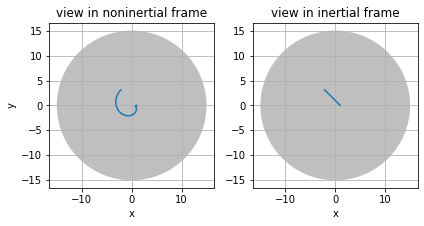

In [9]:
# Define omega and the initial position and velocity of the puck
print('plot for v = [−0.5,−0.5]')
omega = 1
r_0 = [1,0]
v_0 = [-0.5,-0.5]
fInit = r_0 + v_0
r = odeint(deriv,fInit,time)
x0 = r_0[0]
y0 = r_0[1]
vx = v_0[0]
vy = v_0[1] + sqrt(x0**2+y0**2)*omega
f_init_prime =  array([x0,vx,y0,vy]) ### FIX 
time = array(time)
f_solun_prime = pos_prime(f_init_prime,time)

# Plots go here:
figure()
subplot(1,2,1)
grid()
# Add command to plot the pucks trajectory
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x = r[:,0]
y = r[:,1]
plot(x,y)
title('view in noninertial frame')
xlabel('x')
ylabel('y')

# Add command to plot the pucks trajectory
subplot(1,2,2)
grid()
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x_fix = f_solun_prime[0]
y_fix = f_solun_prime[1]
plot(x_fix,y_fix)
title('view in inertial frame')
xlabel('x')
tight_layout()

plot for v = [−0.5,−0.5]


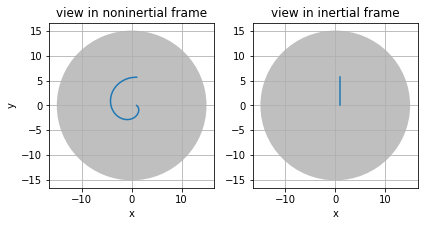

In [10]:
# Define omega and the initial position and velocity of the puck
print('plot for v = [−0.5,−0.5]')
omega = 1
r_0 = [1,0]
v_0 = [0,-0.1]
fInit = r_0 + v_0
r = odeint(deriv,fInit,time)
x0 = r_0[0]
y0 = r_0[1]
vx = v_0[0]
vy = v_0[1] + sqrt(x0**2+y0**2)*omega
f_init_prime =  array([x0,vx,y0,vy]) ### FIX 
time = array(time)
f_solun_prime = pos_prime(f_init_prime,time)

# Plots go here:
figure()
subplot(1,2,1)
grid()
# Add command to plot the pucks trajectory
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x = r[:,0]
y = r[:,1]
plot(x,y)
title('view in noninertial frame')
xlabel('x')
ylabel('y')

# Add command to plot the pucks trajectory
subplot(1,2,2)
grid()
circle = Circle((0, 0), radius=15, fc='0.75') # Creates a grey circle with radius 15 centered at (0,0)
gca().add_patch(circle) # Plots the circle
axis('scaled') # Forces a 1:1 aspect ratio
x_fix = f_solun_prime[0]
y_fix = f_solun_prime[1]
plot(x_fix,y_fix)
title('view in inertial frame')
xlabel('x')
tight_layout()

#### Exercise 9.11
When a puck slides on a rotating turntable, it can come instantaneously to rest in the non-inertial frame. Explain in the space below how this happens in terms of the inertial forces.

   Consider the situation below: 
   
   The direction of velocity is perpendicular to R. and the magnitude of velocity equals to omega times R. At this moment, the angular velocity is omega. So at the moment, the puck is at rest relative to the rotational frame. 
   

## Animating the trajectory
Finally, we can make a movie of the puck. Given the right functions, xt, yt, xt_prime, yt_prime, these last blocks of code will create an animation of the puck with the trajectories in both the inertial and rotating reference frame shown. 

#### Exercise 9.12
In order to show the turntable turning in the inertial reference frame, your movie should include a marker on the edge of the turntable that moves with the turntable. To follow the position of this marker, fill in the function below, pos_marker, to make it return the position of the marker in the inertial reference frame as a function of time. This function should take a time and a radius and return an array of positions. For ease, you can assume the edge marker starts at (r,0) (in cartesian coordinates).

In [11]:
# Function to return the position of a marker on the edge of the turntable.
omega = 1
def pos_marker(t,r):
    return [r*cos(omega*t),r*sin(omega*t)]

#### Exercise 9.13
Fill in code to select $x(t)$ and $y(t)$ for the puck from f_solun = odeint(deriv,f_init,time) (last two lines of the cell).

Then try running the two blocks of code below to produce a movie. After you have successfully run it once, try playing around with the code by changing the amount of time it is run for, the length of time between frames, the initial conditions etc.  

In [16]:
#Define parameters for movie and solve for solution in rotating reference frame

#Define the radius of the turntable
r = 20

#Define time array
dt = 0.01 # time interval for integrator in seconds
max_time = 3*math.pi #maximum time the solution will be calculated to
frame_spacing = 2 #every other value will be plotted
num_frames = round(max_time/dt/frame_spacing) #total number of frames the movie will plot
time = linspace(0.0,max_time,int(max_time/dt)) #time array for the numerical solution

#Define the initial conditions
x0 = 1 # Initial x position
y0 = 0 # Initial y position
vx0 = 0 # Initial x velocity in rotating reference frame
vy0 = 1 # Initial y velocity in rotating reference frame
f_init = [x0,vx0,y0,vy0] # initial values
f_init_prime = [x0,vx0 - y0*omega,y0,vy0 + x0*omega] # initial conditions in inertial reference frame

#Calculate the numerical solution
f_solun = odeint(deriv,f_init,time)
x_pos = f_solun[:,0] ##FIX
y_pos = f_solun[:,1] ##FIX

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


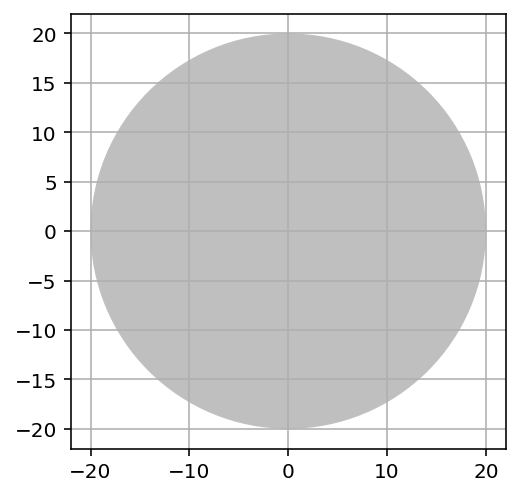

In [14]:
%pylab 
#get rid of inline plotting

# Define and customize the figure, including plotting the turntable.
fig=figure()
ax= axes(xlim=-1*r, ylim=-1*r)
grid()
circle = Circle((0, 0), radius=r, fc='0.75')
gca().add_patch(circle)
plt.axis('scaled')

# Define and customize the markings that will be animated.
edgemarker,=ax.plot([],[], 'ro', ms=6) # The marker on the edge of the turntable.
puckmarker,=ax.plot([],[], 'bo', ms=6) # A marker representing the puck.
puck_track,=ax.plot([],[], 'b', lw=2) # The path of the puck in the inertial reference frame.
puck_track_rot,=ax.plot([],[], 'r', lw=2) # The path of the puck in the rotating reference frame.

# FuncAnimation requires an initialization function.  This just
# lets FuncAnimation know that this line reference is the one to use.
# The function does no plotting since set_data is empty.
def init():
    edgemarker.set_data([], [])
    puckmarker.set_data([], [])
    puck_track.set_data([], [])
    puck_track_rot.set_data([], [])
    return edgemarker, puckmarker, puck_track, puck_track_rot

# function used in the FuncAnimation
def animate(i):
    # This makes the plot, by moving data into lines's set_data method

    j = frame_spacing*i #To keep the movie running fast, we will only plot every other point
    
    t = time[j] # Timestep of the frame
    # Since we want to plot the track and not just the position of the puck, we need to define an 
    # array of times from zero to the current time of the figure.
    t_array = time[0:j]
    
    edgemarker.set_data(pos_marker(t,r)[0],pos_marker(t,r)[1]) # Marker moving on the edge of the turntable   
    puckmarker.set_data(pos_prime(f_init_prime,t)[0],pos_prime(f_init_prime,t)[1]) #Marker representing the puck
    
    # Track in the inertial reference frame
    puck_track.set_data(pos_prime(f_init_prime,t_array)[0],pos_prime(f_init_prime,t_array)[1]) 

    # Track in the rotating reference frame
    theta_array = numpy.arctan(y_pos[0:j]/x_pos[0:j]) #Angle in rotating reference frame
    valid = (x_pos[0:j] < 0).nonzero() #Indices where the x-value is negative and so the calculated value of phi must be adjusted
    theta_array[valid] = theta_array[valid] + math.pi
    r_track = numpy.sqrt(x_pos[0:j]**2 + y_pos[0:j]**2) #radius in rotating reference frame
    x_track = r_track*numpy.cos(theta_array + omega*t) #Adjusting the angle by the amount the turntable has rotate and recalculating the x-coordinate
    y_track = r_track*numpy.sin(theta_array + omega*t) #Same as above for y
    puck_track_rot.set_data(x_track,y_track)
    
    return puck_track, puck_track_rot, edgemarker, puckmarker, 

# for blit True, plot only changes from previous plot to speed up plot calls
# blit must be False on osx (changing the backend will also work, but this is easier)
# use non-inline plots for animation on os
anim= animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=1, blit=False)


## Check-out
#### Exercise 9.14

Briefly summarize in the cell below the ideas in today's lab.


Today we learned how to solce motions in a non-inertial frame numerrically and describe the motion both in inertial frame and non-intertial frame. By coding, we are able to see how coriolis force and centrifugal force work to make the trace of object move in spiral and circle.

## Challenge Problems

Complete the following exercises if you have extra time once you have completed the rest of the lab. These exercises are all centered on solving for the analytic solution and comparing it to the numerical solution.

* Solve for the analytic solution. To do this, solve the two equations by the trick of writing \\(\eta = x + i y\\) and guessing a solution of the form \\( \eta = e^{-i\alpha t}\\). As in the case of the critically damped SHM you will only get one solution. The other solution has the form $B te^{-i\alpha t}$ as we found for the second solution in the damped SHM. Leave your general solution in terms of \\( \eta \\) and appropriate constants.
* Solve for the constants of integration. To do this, assume that at time \\(t = 0 \\), the position was \\( {\bf r}_0 = ( x_0,0) \\) and the velocity was $ {\bf v}_0 = (v_{x0},v_{y0}) $. Show that
$$x(t) = (x_0 + v_{x0} t)\cos \Omega t + (v_{y0} + \Omega x_0 ) t \sin \Omega t$$
$$y(t) = -(x_0 + v_{x0} t)\sin \Omega t + (v_{y0} + \Omega x_0 ) t \cos \Omega t$$   
* Plot your analytic solution and compare against the numerical solution.
